In [1]:
# Data Manipulation

import pandas as pd

import numpy as np

# Visualization

import matplotlib.pyplot as plt

import seaborn as sns

# NLP for text pre-processing

import nltk

import scipy

import re

from scipy import spatial

from nltk.tokenize.toktok import ToktokTokenizer

from nltk.corpus import stopwords

from nltk.tokenize import sent_tokenize, word_tokenize

from nltk.stem import PorterStemmer

tokenizer = ToktokTokenizer()

# other libraries

import gensim

from gensim.models import Word2Vec

import itertools

from sklearn.decomposition import PCA

from sklearn.feature_extraction. text import TfidfVectorizer

from sklearn.decomposition import PCA

# Import linear_kernel

from sklearn.metrics.pairwise import linear_kernel

# remove warnings

import warnings

warnings.filterwarnings (action = 'ignore')

In [2]:
data=pd.read_csv("flipkart_com-ecommerce_sample.csv")
data.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati..."
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23 +0000,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",..."


In [3]:
data.shape

(20000, 15)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  20000 non-null  object 
 1   crawl_timestamp          20000 non-null  object 
 2   product_url              20000 non-null  object 
 3   product_name             20000 non-null  object 
 4   product_category_tree    20000 non-null  object 
 5   pid                      20000 non-null  object 
 6   retail_price             19922 non-null  float64
 7   discounted_price         19922 non-null  float64
 8   image                    19997 non-null  object 
 9   is_FK_Advantage_product  20000 non-null  bool   
 10  description              19998 non-null  object 
 11  product_rating           20000 non-null  object 
 12  overall_rating           20000 non-null  object 
 13  brand                    14136 non-null  object 
 14  product_specifications

Here are the observations.

* The data set has a total of 15 columns and 20,000 observations.

* is_FK_Advantage_product is a boolean, the retail_price and discounted price columns are numerical, and the remaining are categorical.


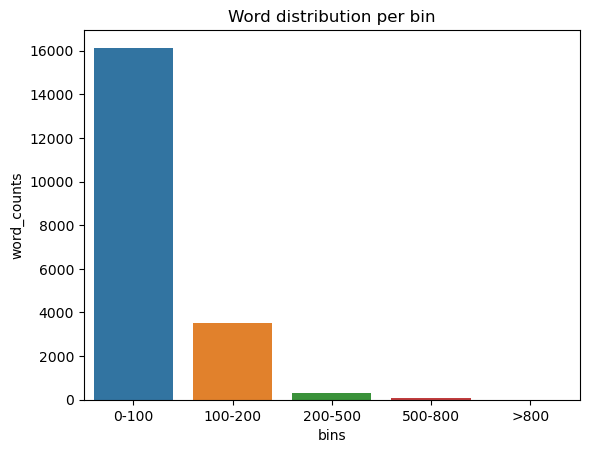

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Let's add a new length column to give the total length of the 'description' input variable.

data['length'] = data['description'].str.len()

# Add a new column for the number of words in the description before text preprocessing.

data['no_of_words'] = data['description'].apply(lambda x: len(x.split()) if isinstance(x, str) else np.nan)

#The following is the word count distribution for 'description'.

bins = [0, 100, 300, 500, 800, np.inf]

labels = ['0-100', '100-200', '200-500', '500-800', '>800']

data['bins'] = pd.cut(data.no_of_words, bins=bins, labels=labels)

words_distribution = data.groupby('bins').size().reset_index(name='word_counts')

sns.barplot(x='bins', y='word_counts', data=words_distribution)

plt.title("Word distribution per bin")

plt.show()

## Data Preprocessing

Data preprocessing includes data cleaning, preparation, transformation, and dimensionality reduction, which convert the raw data into a form that is suitable for further processing.

In [5]:
missing = pd.DataFrame(data.isnull().sum()).rename (columns = {0: 'missing' })

missing['percent'] = missing['missing'] /len(data)

missing.sort_values ('percent', ascending = False)

,missing,percent
brand,5864,0.29320
retail_price,78,0.00390
discounted_price,78,0.00390
product_specifications,14,0.00070
image,3,0.00015
description,2,0.00010
uniq_id,0,0.00000
crawl_timestamp,0,0.00000
product_url,0,0.00000
product_name,0,0.00000


Above output shows that nearly 30% of the brand variables have missing values. Other variables have a negligible number of missing values.

Again, let's move into text preprocessing using multiple methods.


## Text Preprocessing

There is a lot of unwanted information present in the text data. Let's clean it up. Text preprocessing tasks include

* Converting the text data to lowercase

* Removing/replacing the punctuations

* Removing/replacing the numbers

* Removing extra whitespaces

* Removing stop words

* Stemming and lemmatization

In [8]:
# Remove punctuation

data['description'] = data['description'].str.replace(r'[^\w\d\s]',' ')

# Replace whitespace between terms with a single space

data['description'] = data['description'].str.replace(r'\s+',' ')

# Remove leading and trailing whitespace

data['description'] = data['description'].str.replace(r'^\s+|\s+?$','')

# converting to lower case

data['description'] = data['description'].str.lower()

data['description'].head()

0    key features of alisha solid women s cycling s...
1    fabhomedecor fabric double sofa bed finish col...
2    key features of aw bellies sandals wedges heel...
3    key features of alisha solid women s cycling s...
4    specifications of sicons all purpose arnica do...
Name: description, dtype: object

In [9]:
import nltk
nltk.download('stopwords')
#Removing stop words
stop=stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [10]:
import re

pattern = r'\b(?:{})\b'.format('|'.join(stop))

data['description'] = data['description'].str.replace(pattern, '')

# Removing single characters

data['description'] = data['description'].str.replace(r'\s+', ' ')

data['description'] = data['description'].apply(lambda x: " ".join([word for word in str(x).split() if len(word) > 1]))

# Removing domain related stop words from description

specific_stop_words = ["rs", "flipkart", "buy", "com", "free", "day", "cash", "replacement", "guarantee", "genuine", "key", "feature", "delivery", "products", "product", "shipping", "online", "india", "shop"]

data['description'] = data['description'].apply(lambda x: " ".join(word for word in str(x).split() if word not in specific_stop_words))

data['description'].head()

0    features alisha solid women cycling shorts cot...
1    fabhomedecor fabric double sofa bed finish col...
2    features aw bellies sandals wedges heel casual...
3    features alisha solid women cycling shorts cot...
4    specifications sicons purpose arnica dog shamp...
Name: description, dtype: object

Let's also see what are the most occurred words in the corpus and understand the data better.

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


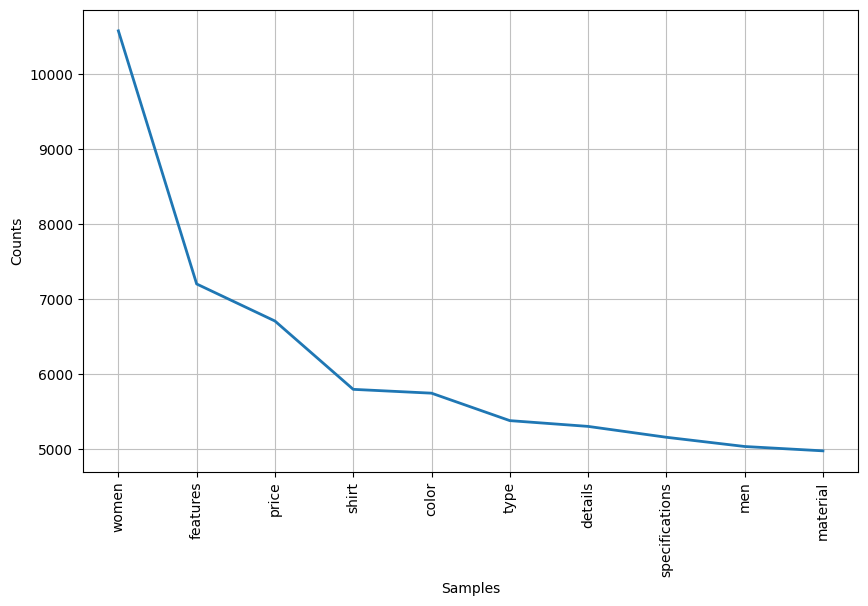

[('women', 10574), ('features', 7199), ('price', 6705), ('shirt', 5794), ('color', 5743), ('type', 5377), ('details', 5300), ('specifications', 5155), ('men', 5032), ('material', 4974)]


In [11]:
import nltk
nltk.download('punkt')

# Top frequent words after removing domain related stop words
a = data['description'].str.cat(sep=' ')
words = nltk.tokenize.word_tokenize(a)

# Filter out non-alphabetic words and stopwords
words = [word for word in words if re.match(r'^[a-zA-Z]+$', word) and word.lower() not in stopwords.words('english')]

word_dist = nltk.FreqDist(words)

# Plotting the top 10 most frequent words
plt.figure(figsize=(10, 6))
word_dist.plot(10, cumulative=False)

# Displaying the most common words
print(word_dist.most_common(10))

# Model Building

So far, we have tried to understand data to build better solutions. Now we need to solve problems using algorithms.

There are two models we want to build.

* A content-based recommendation system

* A product search engine

Let's use different NLP techniques, such as TF-IDF and word embeddings. TF-IDF and word embeddings can be used with both models. From the implementation point of view, both models are almost the same. But the problem each solves is different.

So, let's use the TF-IDF approach to solve with a content-based recommendation system and word embeddings for the search engine. But note that reserve can also be done.

Let's start with the recommendation system.

## Content-based Recommendation System

Now that you know about content-based recommender systems, let's start implementing one.

For content-based systems, let's use the TF-IDF approach.

In [12]:
#text cleaning

data['description'] = data['description'].fillna('')

#define the vectorizer

T_vec = TfidfVectorizer (stop_words='english')

# get the vectors

T_vec_matrix = T_vec.fit_transform(data['description'])

#shape

T_vec_matrix.shape

(20000, 26163)

There are 26,000 unique words in the description.

Next, let's calculate similarity scores for each combination and generate matrix.

A cosine similarity is used in this project. We need to write a function that takes product descriptions as input and lists N most similar items/products.

We also need to do reverse mapping of product names to their indices.

In [13]:
# Reversing the map of indices and product

product_index = pd. Series (data.index, index=data['product_name']).drop_duplicates()

product_index

product_name
Alisha Solid Women's Cycling Shorts            0
FabHomeDecor Fabric Double Sofa Bed            1
AW Bellies                                     2
Alisha Solid Women's Cycling Shorts            3
Sicons All Purpose Arnica Dog Shampoo          4
                                           ...  
WallDesign Small Vinyl Sticker             19995
Wallmantra Large Vinyl Stickers Sticker    19996
Elite Collection Medium Acrylic Sticker    19997
Elite Collection Medium Acrylic Sticker    19998
Elite Collection Medium Acrylic Sticker    19999
Length: 20000, dtype: int64

In the following steps, everything is wrapped under a single function to make testing easier.

1. Obtain the index given the product.

2. Obtain cosine similarity scores.

3. Sort the scores.

4. Get the top N results from the list.

5. Output the product names.



In [14]:
# Function that takes in product title as input and outputs the most similar product

def predict_products (text):

    # getting index
    index = product_index[text]

    # Obtaining the pairwsie similarity scores
    score_matrix = linear_kernel (T_vec_matrix[index], T_vec_matrix)

    matching_sc= list(enumerate (score_matrix[0]))

    # Sort the product based on the similarity scores
    matching_sc= sorted(matching_sc, key=lambda x: x[1], reverse=True)

    # Getting the scores of the 10 most similar product
    matching_sc= matching_sc[1:10]

    # Getting the product indices
    product_indices = [i[0] for i in matching_sc]

    # Show the similar products
    return data['product_name'].iloc[product_indices]

recommended_product = predict_products(input("Enter a product name: "))

if recommended_product is not None:

    print ("Similar products")
    print("\n")
    for product_name in recommended_product:
        print(product_name)

Enter a product name: Engage Urge and Urge Combo Set
Similar products


Engage Rush and Urge Combo Set
Engage Urge-Mate Combo Set
Engage Jump and Urge Combo Set
Engage Fuzz and Urge Combo Set
Engage Mate+Urge Combo Set
Engage Urge+Tease Combo Set
Engage Combo Set
Engage Combo Set
Engage Combo Set


Let's look one more example

In [15]:
recommended_product = predict_products(input("Enter a product name: "))

if recommended_product is not None:

    print ("Similar products")
    print("\n")
    for product_name in recommended_product:
        print(product_name)

Enter a product name: Lee Parke Running Shoes
Similar products


Lee Parke Walking Shoes
N Five Running Shoes
Knight Ace Kraasa Sports Running Shoes, Cycling Shoes, Walking Shoes
WorldWearFootwear Running Shoes, Walking Shoes
reenak Running Shoes
Chazer Running Shoes
Glacier Running Shoes
Sonaxo Men Running Shoes
ETHICS Running Shoes


Observe the results. If a customer clicks Lee Parke Running Shoes, they get recommendations based on any other brand running shoes or Lee Parke's any other products.

* Lee Parke Walking Shoes is there because of the Lee Parke brand.

* The rest of the recommendations are running shoes by a different brand.

You can also add price as a feature and get only products in the price range of the customer's selected product.

This is one version of the recommendation system using NLP. To get better results, you can do the following things.

* A better approach to the content-based recommender system can be applied by creating the user profile (currently not in the scope of the data set).

* Use word embeddings as features.

* Try different distance measures.

That's it. We explored how to build a recommendation system using natural language processing.

Now let's move on to another interesting use case which is a product search engine.

# Product Search Engine

The next problem statement is optimizing the search engine to get better search results.

The biggest challenge is that most search engines are string matching and might not perform well in all circumstances.

For example, if the user searches "guy shirt", the search results should have all the results that have men, a boy, and so on. The search should not work based on string match, but the other similar words should also consider.

The best way to solve this problem is word embeddings.

Word embeddings are N-dimensional vectors for each word that captures the meaning of the word along with context.

word2vec is one of the methods to construct such an embedding. It uses a shallow neural network to build the embeddings. There are two ways the embeddings can be built: skip-gram and CBOW (common bag-of-words).

The CBOW method takes each word's context as the input and predicts the word corresponding to the context. The input to the network context and passed to the hidden layer with N neurons. Then at the end, the output layer predicts the word using the softmax layer. The hidden layer neuron's weight is considered the vector that captured the meaning and context.

The skip-gram model is the reverse of CBOW. The word is the input, and the network predicts context.

That's the brief theory about word embeddings and how it works. We can build the embeddings or use existing trained ones. It takes a lot of data and resources to build one, and for domains like healthcare, we need to build our own because generalized embeddings won't perform well.

## Implementation

Let's use the pretrained word2vec model on the news data set by Google. The trained model can be imported, and vectors can be obtained for each word. Then, any of the similarity measures can be leveraged to rank the results.

In [16]:
# Creating list containing description of each product as sublist

fin=[]

for i in range(len(data['description'])):
    temp=[]
    temp.append(data['description'][i])
    fin=fin+temp

data1 = data[['product_name', 'description']]

#import the word2vec

from gensim.models import KeyedVectors

filename = ("/content/drive/MyDrive/GoogleNews-vectors-negative300.bin")

model = KeyedVectors.load_word2vec_format(filename, binary=True,limit=50000)

#Preprocessing

def remove_stopwords (text, is_lower_case=False):
    pattern = r'[^a-zA-Z0-9\s]'
    text = re.sub (pattern, '', text[0])
    tokens = nltk.word_tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stop]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stop]
    filtered_text=' '.join(filtered_tokens)
    return filtered_text

def get_embedding(word):
    if word in model.key_to_index:
        return model[word]
    else:
        return np.zeros(model.vector_size)

data['word_embeddings'] = data['description'].apply(lambda x: np.mean([get_embedding(word) for word in nltk.word_tokenize(remove_stopwords(x))], axis=0))

# Obtaining the average vector for all the documents

out_dict = {}

for sen in fin:
    average_vector = (np.mean(np.array([get_embedding(x) for x in nltk.word_tokenize(remove_stopwords (sen))]), axis=0))
    dict = {sen : (average_vector) }
    out_dict.update(dict)

# Get the similarity between the query and documents

def get_sim(query_embedding, average_vector_doc):
    sim = 1 - scipy.spatial.distance.cosine(query_embedding.flatten(), average_vector_doc.flatten())
    return sim

# Rank all the documents based on the similarity

def Ranked_documents (query):
    global rank
    query_words = (np.mean (np.array([get_embedding(x) for x in nltk.word_tokenize(query.lower())], dtype=float), axis=0))
    rank  = []
    for k,v in out_dict.items():
        rank.append((k, get_sim(query_words, v)))
    rank = sorted (rank, key=lambda t: t[1], reverse=True)
    dd = pd.DataFrame (rank, columns=['Desc', 'score'])
    rankfin = pd.merge(data1, dd, left_on='description', right_on='Desc')
    rankfin = rankfin[['product_name', 'description', 'score']]
    print('Ranked Documents :')
    return rankfin

# Call the IR function with a query

query=input("What would you like to search")
Ranked_documents(query)
#output

What would you like to searchbag
Ranked Documents :


,product_name,description,score
0,Alisha Solid Women's Cycling Shorts,features alisha solid women cycling shorts cot...,0.107118
1,FabHomeDecor Fabric Double Sofa Bed,fabhomedecor fabric double sofa bed finish col...,0.107118
2,AW Bellies,features aw bellies sandals wedges heel casual...,0.107118
3,Alisha Solid Women's Cycling Shorts,features alisha solid women cycling shorts cot...,0.107118
4,Sicons All Purpose Arnica Dog Shampoo,specifications sicons purpose arnica dog shamp...,1.000000
...,...,...,...
19995,Wallmantra Large Vinyl Stickers Sticker,wallmantra large vinyl stickers sticker 1369 w...,0.113536
19996,Wallmantra Extra Large Vinyl Stickers Sticker,wallmantra extra large vinyl stickers sticker ...,0.113536
19997,Wallmantra Extra Large Vinyl Stickers Sticker,wallmantra extra large vinyl stickers sticker ...,0.113536
19998,Wallmantra Extra Large Vinyl Stickers Sticker,wallmantra extra large vinyl stickers sticker ...,0.113536


# Advanced Search Engine Using PyTerrier and Sentence-BERT

Let's few advanced deep learning-based solutions to solve this problem.Below Figure shows the entire framework for this approach.

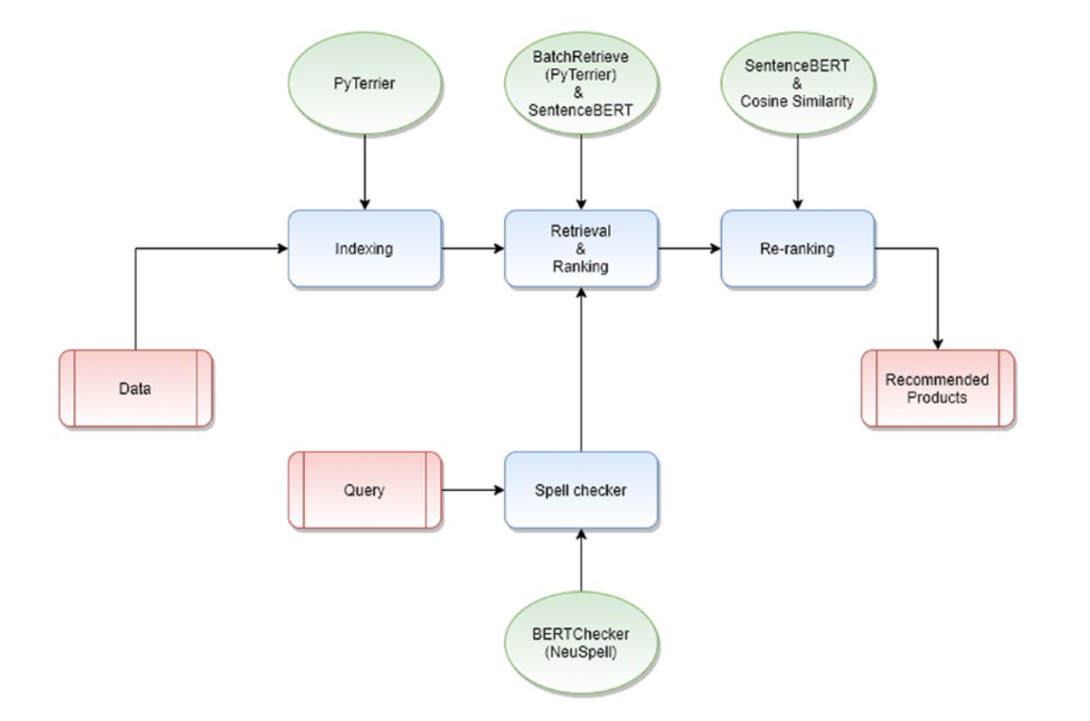

Indexing is an important part of information retrieval (IR) systems. For indexing, we use DFIndexer. Indexing simplifies the retrieval process.

BatchRetrieve is one of the most widely used PyTerrier objects. It uses a pre-existing Terrier index data structure.

**NeuSpell** is an open source package for correcting spellings based on the context. This package has ten spell-checkers based on various neural models. To implement this model, import the BERTChecker package from NeuSpell.

BERTChecker works for multiple languages, including English, Arabic, Hindi, and Japanese.

Let's use the PyTerrier and Sentence-BERT libraries and proceed with implementation.

The following installs the required packages and libraries.

In [17]:
import pandas as pd

import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt

import string

import re

%matplotlib inline

import nltk

nltk.download('punkt')

nltk.download('wordnet')

nltk.download('stopwords')

from nltk.corpus import stopwords

from nltk.tokenize import word_tokenize

from nltk.stem.wordnet import WordNetLemmatizer

lem = WordNetLemmatizer()

stop_words = set (stopwords.words('english'))

exclude = set(string.punctuation)

import string

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [18]:
!pip install python-terrier
import pyterrier as pt
if not pt.started():
    pt.init()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.4/104.4 kB 8.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 72.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.6/69.6 kB 8.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.0/318.0 kB 39.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.8/48.8 kB 6.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 287.4/287.4 kB 32.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.1/45.1 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 74.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ..

PyTerrier 0.9.2 has loaded Terrier 5.7 (built by craigm on 2022-11-10 18:30) and terrier-helper 0.0.7



In [19]:
!pip install -U sentence-transformers

!pip install neuspell

!pip install -e neuspell/

!git clone https://github.com/neuspell/neuspell; cd neuspell

import os

os.chdir("/content/neuspell")

!pip install -r /content/neuspell/extras-requirements.txt

!python -m spacy download en_core_web_sm

#Unzipping the multi-linguistic packages

!wget https://storage.googleapis.com/bert_models/2018_11_23/multi_cased_L-12_H-768_A-12.zip

!unzip *.zip

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 7.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 43.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 50.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 23.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 70.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 44.0 MB/s eta 0:00:00
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125926 sha256=54ffb98d498332c5aca0775c20735747580c95d776ffe6c35b1b0042fcc3e475
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence-transformers
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.8/123.8 kB 13.4 MB/s eta

In [20]:
#importing neuspell

from neuspell import BertChecker

from sklearn.metrics. pairwise import cosine_similarity

from sentence_transformers import SentenceTransformer

model = SentenceTransformer('sentence-transformers/bert-base-nli-mean-tokens')

# Load the data set.

df=pd.read_csv("/content/drive/MyDrive/flipkart_com-ecommerce_sample.csv")

data folder is set to `/content/neuspell/neuspell/../data` script


In [21]:
df.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati..."
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23 +0000,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",..."


In [22]:
print(df.columns)

Index(['uniq_id', 'crawl_timestamp', 'product_url', 'product_name',
       'product_category_tree', 'pid', 'retail_price', 'discounted_price',
       'image', 'is_FK_Advantage_product', 'description', 'product_rating',
       'overall_rating', 'brand', 'product_specifications'],
      dtype='object')


In [23]:
print(df.product_category_tree)

0        ["Clothing >> Women's Clothing >> Lingerie, Sl...
1        ["Furniture >> Living Room Furniture >> Sofa B...
2        ["Footwear >> Women's Footwear >> Ballerinas >...
3        ["Clothing >> Women's Clothing >> Lingerie, Sl...
4        ["Pet Supplies >> Grooming >> Skin & Coat Care...
                               ...                        
19995    ["Baby Care >> Baby & Kids Gifts >> Stickers >...
19996    ["Baby Care >> Baby & Kids Gifts >> Stickers >...
19997    ["Baby Care >> Baby & Kids Gifts >> Stickers >...
19998    ["Baby Care >> Baby & Kids Gifts >> Stickers >...
19999    ["Baby Care >> Baby & Kids Gifts >> Stickers >...
Name: product_category_tree, Length: 20000, dtype: object


## Data Preprocessing
Let's do some more text preprocessing

In [25]:
df['product_category_tree'] = df['product_category_tree'].str.replace('>>', ',')
df['product_category_tree'] = df['product_category_tree'].str.replace('"', '')

In [26]:
print(df.product_category_tree)

0        [Clothing , Women's Clothing , Lingerie, Sleep...
1        [Furniture , Living Room Furniture , Sofa Beds...
2        [Footwear , Women's Footwear , Ballerinas , AW...
3        [Clothing , Women's Clothing , Lingerie, Sleep...
4        [Pet Supplies , Grooming , Skin & Coat Care , ...
                               ...                        
19995    [Baby Care , Baby & Kids Gifts , Stickers , Wa...
19996    [Baby Care , Baby & Kids Gifts , Stickers , Wa...
19997    [Baby Care , Baby & Kids Gifts , Stickers , El...
19998    [Baby Care , Baby & Kids Gifts , Stickers , El...
19999    [Baby Care , Baby & Kids Gifts , Stickers , El...
Name: product_category_tree, Length: 20000, dtype: object


In [27]:
!pip install neuspell
!pip install neuspell neuspell[elmo] neuspell[spacy] --no-deps

In [28]:
# drop unwamted columns
df.drop(['crawl_timestamp', 'product_url', 'image',"retail_price","discounted_price","is_FK_Advantage_product", "product_rating", "overall_rating", "product_specifications"],axis=1, inplace=True)

In [29]:
df.head()

,uniq_id,product_name,product_category_tree,pid,description,brand
0,c2d766ca982eca8304150849735ffef9,Alisha Solid Women's Cycling Shorts,"[Clothing , Women's Clothing , Lingerie, Sleep...",SRTEH2FF9KEDEFGF,Key Features of Alisha Solid Women's Cycling S...,Alisha
1,7f7036a6d550aaa89d34c77bd39a5e48,FabHomeDecor Fabric Double Sofa Bed,"[Furniture , Living Room Furniture , Sofa Beds...",SBEEH3QGU7MFYJFY,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,FabHomeDecor
2,f449ec65dcbc041b6ae5e6a32717d01b,AW Bellies,"[Footwear , Women's Footwear , Ballerinas , AW...",SHOEH4GRSUBJGZXE,Key Features of AW Bellies Sandals Wedges Heel...,AW
3,0973b37acd0c664e3de26e97e5571454,Alisha Solid Women's Cycling Shorts,"[Clothing , Women's Clothing , Lingerie, Sleep...",SRTEH2F6HUZMQ6SJ,Key Features of Alisha Solid Women's Cycling S...,Alisha
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,Sicons All Purpose Arnica Dog Shampoo,"[Pet Supplies , Grooming , Skin & Coat Care , ...",PSOEH3ZYDMSYARJ5,Specifications of Sicons All Purpose Arnica Do...,Sicons


In [30]:
#drop duplicate products

uniq_prod=df.copy()

uniq_prod.drop_duplicates (subset ="product_name", keep = "first", inplace = True)

In [31]:
import nltk
from nltk.corpus import stopwords

# Download the stopwords corpus
nltk.download('stopwords')

# Remove stop words and modify certain words in the description column
stop_words = set(stopwords.words('english'))

df['description'] = df['description'].astype(str).str.lower().str.split()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [32]:
print(df.description)

0        [key, features, of, alisha, solid, women's, cy...
1        [fabhomedecor, fabric, double, sofa, bed, (fin...
2        [key, features, of, aw, bellies, sandals, wedg...
3        [key, features, of, alisha, solid, women's, cy...
4        [specifications, of, sicons, all, purpose, arn...
                               ...                        
19995    [buy, walldesign, small, vinyl, sticker, for, ...
19996    [buy, wallmantra, large, vinyl, stickers, stic...
19997    [buy, elite, collection, medium, acrylic, stic...
19998    [buy, elite, collection, medium, acrylic, stic...
19999    [buy, elite, collection, medium, acrylic, stic...
Name: description, Length: 20000, dtype: object


In [33]:
# Remove stop words and punctuations and then perform tokenization and lemmatization.

def filter_keywords (doc):
  doc=doc.lower()
  stop_free = " ".join([i for i in doc.split() if i not in stop_words])
  punc_free = " ".join(ch for ch in stop_free if ch not in exclude)
  word_tokens = word_tokenize(punc_free)
  filtered_sentence = [(lem.lemmatize (w, "v")) for w in word_tokens]
  return filtered_sentence

In [34]:
# Apply the filter_keywords function to selected columns to obtain the keywords for each column.

uniq_prod['product'] = uniq_prod['product_name'].apply(filter_keywords)

uniq_prod['brand'] = uniq_prod['brand'].astype("str").apply(filter_keywords)

uniq_prod['description']=df.description

In [35]:
#combine all keywords for each product

uniq_prod["keywords"] = uniq_prod['product'].apply(lambda x: [x]) + uniq_prod['brand'].apply(lambda x: [x]) + df['product_category_tree'].apply(lambda x: [x])

uniq_prod["keywords"] = uniq_prod["keywords"].apply(lambda x: ' '.join(str(item) for item in x))

#Creating a 'docno' column, which gives recommendations.

uniq_prod['docno'] = uniq_prod['product_name'].astype(str)

keywords=uniq_prod["keywords"]

In [36]:
print(keywords)

0        ['a', 'l', 'i', 's', 'h', 'a', 's', 'o', 'l', ...
1        ['f', 'a', 'b', 'h', 'o', 'm', 'e', 'd', 'e', ...
2        ['a', 'w', 'b', 'e', 'l', 'l', 'i', 'e', 's'] ...
4        ['s', 'i', 'c', 'o', 'n', 's', 'p', 'u', 'r', ...
5        ['e', 't', 'e', 'r', 'n', 'a', 'l', 'g', 'a', ...
                               ...                        
19936    ['p', 'u', 'r', 'p', 'l', 'e', 'w', 'o', 'm', ...
19948    ['u', 'b', 'e', 'r', 'l', 'y', 'f', 'e', 'l', ...
19958    ['w', 'i', 't', 'c', 'h', 'e', 's', 'c', 'o', ...
19962    ['s', 't', 'y', 'l', 'i', 's', 't', 'r', 'y', ...
19976    ['u', 'b', 'e', 'r', 'l', 'y', 'f', 'e', 'e', ...
Name: keywords, Length: 12676, dtype: object


In [37]:
uniq_prod["keywords"] = uniq_prod["keywords"].apply(lambda x: ' '.join([word for word in x.split() if word.isalpha()]))

In [38]:
print(uniq_prod["keywords"])

0        Clothing Sleep Swimwear Shorts Alisha Shorts A...
1        Living Room Furniture Sofa Beds Futons FabHome...
2                                   Footwear Ballerinas AW
4        Supplies Grooming Skin Coat Care Shampoo Sicon...
5                        Gandhi Super Series Crystal Paper
                               ...                        
19936                                             Footwear
19948               Care Baby Kids Gifts Stickers Uberlyfe
19958                                             Footwear
19962                                             Footwear
19976               Care Baby Kids Gifts Stickers Uberlyfe
Name: keywords, Length: 12676, dtype: object


In [39]:
#drop unwanted columns

uniq_prod.drop(['product', 'brand','pid', 'product_name'], axis=1, inplace=True)

uniq_prod.head()

,uniq_id,product_category_tree,description,keywords,docno
0,c2d766ca982eca8304150849735ffef9,"[Clothing , Women's Clothing , Lingerie, Sleep...","[key, features, of, alisha, solid, women's, cy...",Clothing Sleep Swimwear Shorts Alisha Shorts A...,Alisha Solid Women's Cycling Shorts
1,7f7036a6d550aaa89d34c77bd39a5e48,"[Furniture , Living Room Furniture , Sofa Beds...","[fabhomedecor, fabric, double, sofa, bed, (fin...",Living Room Furniture Sofa Beds Futons FabHome...,FabHomeDecor Fabric Double Sofa Bed
2,f449ec65dcbc041b6ae5e6a32717d01b,"[Footwear , Women's Footwear , Ballerinas , AW...","[key, features, of, aw, bellies, sandals, wedg...",Footwear Ballerinas AW,AW Bellies
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,"[Pet Supplies , Grooming , Skin & Coat Care , ...","[specifications, of, sicons, all, purpose, arn...",Supplies Grooming Skin Coat Care Shampoo Sicon...,Sicons All Purpose Arnica Dog Shampoo
5,c2a17313954882c1dba461863e98adf2,[Eternal Gandhi Super Series Crystal Paper Wei...,"[key, features, of, eternal, gandhi, super, se...",Gandhi Super Series Crystal Paper,Eternal Gandhi Super Series Crystal Paper Weig...


## Building Search Engine

In [47]:
!rm -rf /content/iter_index_porter

pd_indexer = pt.DFIndexer("/content/haw_pd_index")

indexref = pd_indexer.index (uniq_prod[ "keywords"], uniq_prod["docno"])

# Let's implementing the NeuSpell spell checker on the user query and save it to an object.

spellcheck = BertChecker()

# folder where the model is saved

spellcheck.from_pretrained(ckpt_path=f"/content/bert_multicased_L-12_H-768_A-12" )

X=input("Search Engine:")

query=spellcheck.correct(X)

print(query)

Search Engine: womns clothing
women clothing


In the output, there is a list of products that are a part of women's clothing. The corresponding scores represent relevance. Note that the results are very relevant to the search query

## Enhancing E-commerce Using an Advanced Engine and Recommendation System ends here.

### Linear Regression

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error



# Drop rows where 'product_rating' is 'No rating available'
data = data[data['product_rating'] != 'No rating available']

# Data Preparation
# Select 'retail_price' and 'discounted_price' as features and 'product_rating' as the target variable
X = data[['retail_price', 'discounted_price']].astype(float)  # Convert selected columns to float
y = data['product_rating'].astype(float)  # Convert 'product_rating' to float

# Fill missing values in 'retail_price' and 'discounted_price' columns with the mean value
X.fillna(X.mean(), inplace=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Coefficients and Intercept
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)



Mean Squared Error: 1.5518334502952662
Coefficients: [-2.06256505e-05  5.31199395e-05]
Intercept: 3.768383328639515


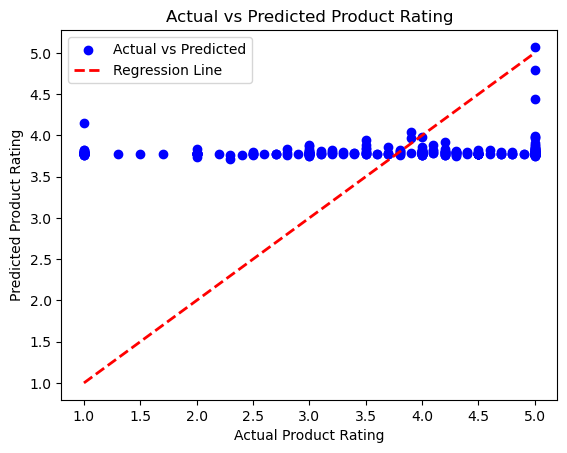

In [6]:
# Plot actual vs predicted values
plt.scatter(y_test, y_pred, color='blue', label='Actual vs Predicted')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', lw=2, label='Regression Line')
plt.xlabel("Actual Product Rating")
plt.ylabel("Predicted Product Rating")
plt.title("Actual vs Predicted Product Rating")
plt.legend()
plt.show()

### Logistic regression

### Naive-Bayes

In [8]:
from sklearn.naive_bayes import GaussianNB

# Naive Bayes Model
naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train, y_train)

# Make predictions
y_pred_nb = naive_bayes_model.predict(X_test)

# Evaluate the model
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print("Naive Bayes Accuracy:", accuracy_nb)
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification Report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)


Naive Bayes Accuracy: 0.37567567567567567
Confusion Matrix:
[[  0 119]
 [  0 251]]
Classification Report:
              precision    recall  f1-score   support

       False       0.00      0.00      0.00       119
        True       0.68      1.00      0.81       251

    accuracy                           0.68       370
   macro avg       0.34      0.50      0.40       370
weighted avg       0.46      0.68      0.55       370



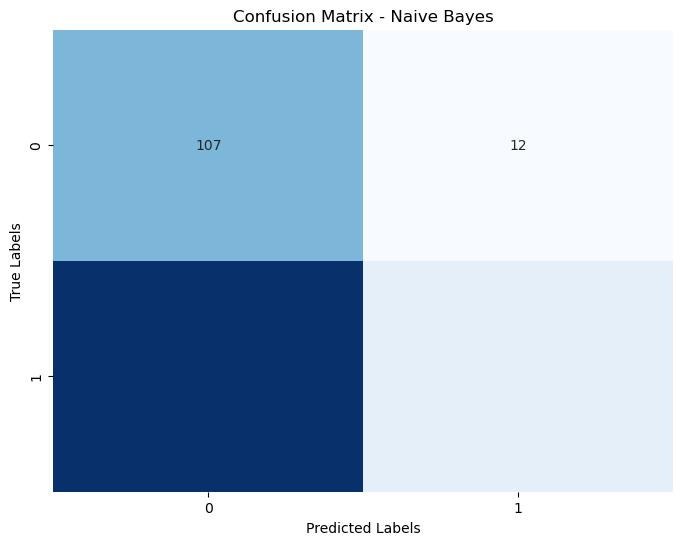

Classification Report - Naive Bayes:
              precision    recall  f1-score   support

       False       0.33      0.90      0.48       119
        True       0.73      0.13      0.22       251

    accuracy                           0.38       370
   macro avg       0.53      0.51      0.35       370
weighted avg       0.60      0.38      0.30       370



In [9]:
from sklearn.metrics import confusion_matrix, classification_report

# Calculate confusion matrix
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_nb, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Naive Bayes')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Classification Report
class_report_nb = classification_report(y_test, y_pred_nb)
print("Classification Report - Naive Bayes:")
print(class_report_nb)

### Decision Tree

In [10]:
from sklearn.tree import DecisionTreeClassifier

# Decision Tree Model
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)

# Make predictions
y_pred_dt = decision_tree_model.predict(X_test)

# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Accuracy:", accuracy_dt)

Decision Tree Accuracy: 0.6297297297297297


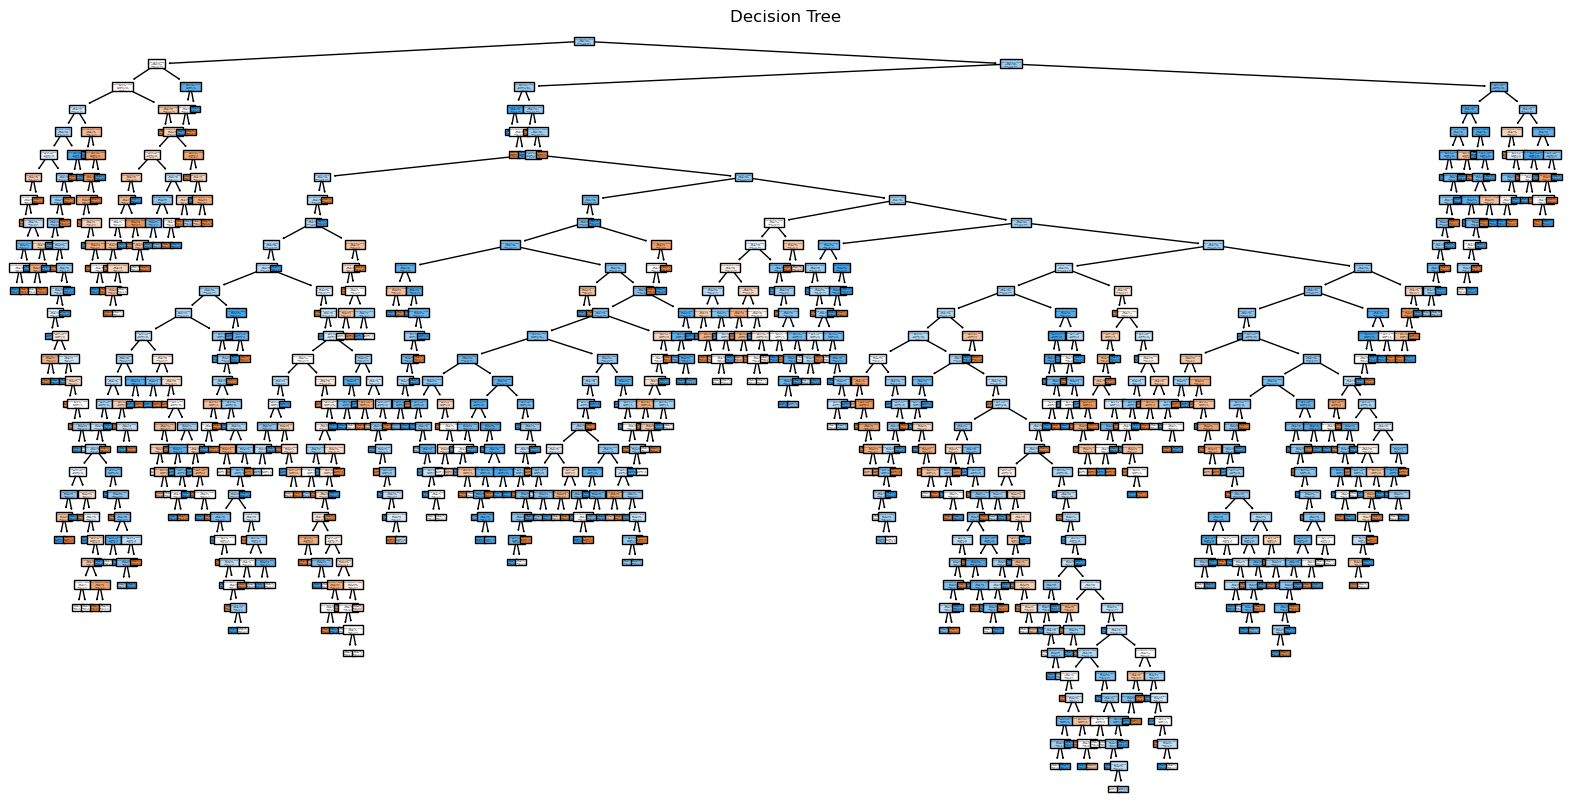

In [11]:
from sklearn.tree import plot_tree

# Plot Decision Tree
plt.figure(figsize=(20,10))
plot_tree(decision_tree_model, filled=True, feature_names=X_train.columns, class_names=["0", "1"])
plt.title("Decision Tree")
plt.show()


### K-Means

In [12]:
from sklearn.cluster import KMeans

# K-Means Model
kmeans_model = KMeans(n_clusters=2)  # Specify the number of clusters
kmeans_model.fit(X_train)

# Make predictions
y_pred_km = kmeans_model.predict(X_test)

# Evaluate the model - In clustering, evaluation metrics differ, such as silhouette score.
# However, since we have labels, we can still use accuracy for demonstration.
accuracy_km = accuracy_score(y_test, y_pred_km)
print("K-Means Accuracy:", accuracy_km)


K-Means Accuracy: 0.32972972972972975


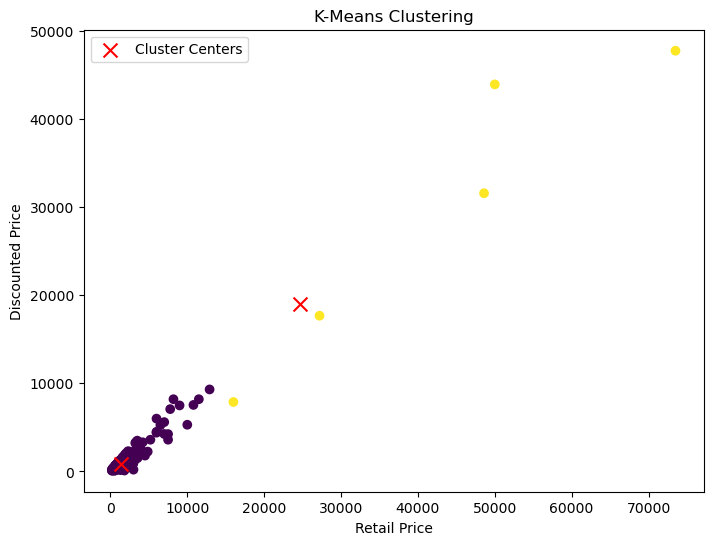

In [13]:

plt.figure(figsize=(8, 6))
plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=y_pred_km, cmap='viridis')
plt.scatter(kmeans_model.cluster_centers_[:, 0], kmeans_model.cluster_centers_[:, 1], marker='x', s=100, c='red', label='Cluster Centers')
plt.xlabel('Retail Price')
plt.ylabel('Discounted Price')
plt.title('K-Means Clustering')
plt.legend()
plt.show()
